# Name: HeeSeung Park
# Machine Learning Final Project
## Wine Quality Prediction 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import kernel_ridge
from sklearn import svm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import sys
import time
from scipy.special import expit

In [4]:
# importing files (red and white)
redwine_df = pd.read_csv('winequality-red.csv', sep=';')
whitewine_df = pd.read_csv('winequality-white.csv', sep=';')

In [5]:
# red wine columns
redwine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# white wine columns
whitewine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
# red wine data
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# white wine data
whitewine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
# red wine data statistics 
# (count, mean, std, min, 1st 2nd 3rd quartile, max)
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# white wine data statistics 
# (count, mean, std, min, 1st 2nd 3rd quartile, max)
whitewine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


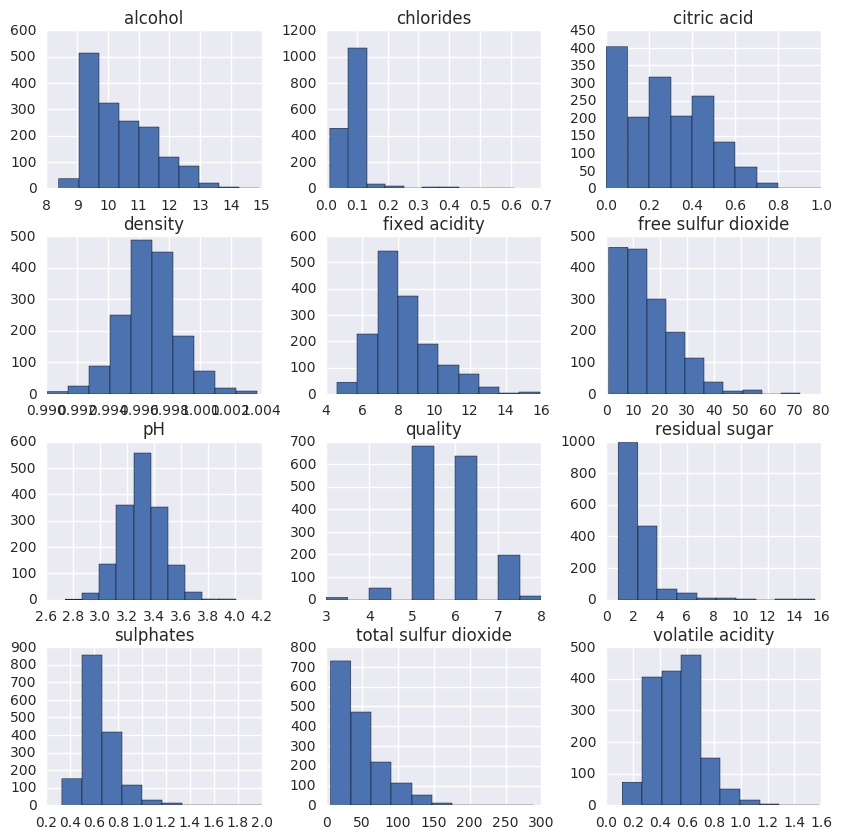

In [11]:
# The distribution of the data by visualizing with a bar plot
# red wine distribution
sns.set()
redwine_df.hist(figsize=(10,10))
plt.show()

Really interesting to see that we have many of grade 5 and 6 wines, in fact, 5 and 6 comprise the majority of the quality data. Let's see what we will see from the white wine samples too.

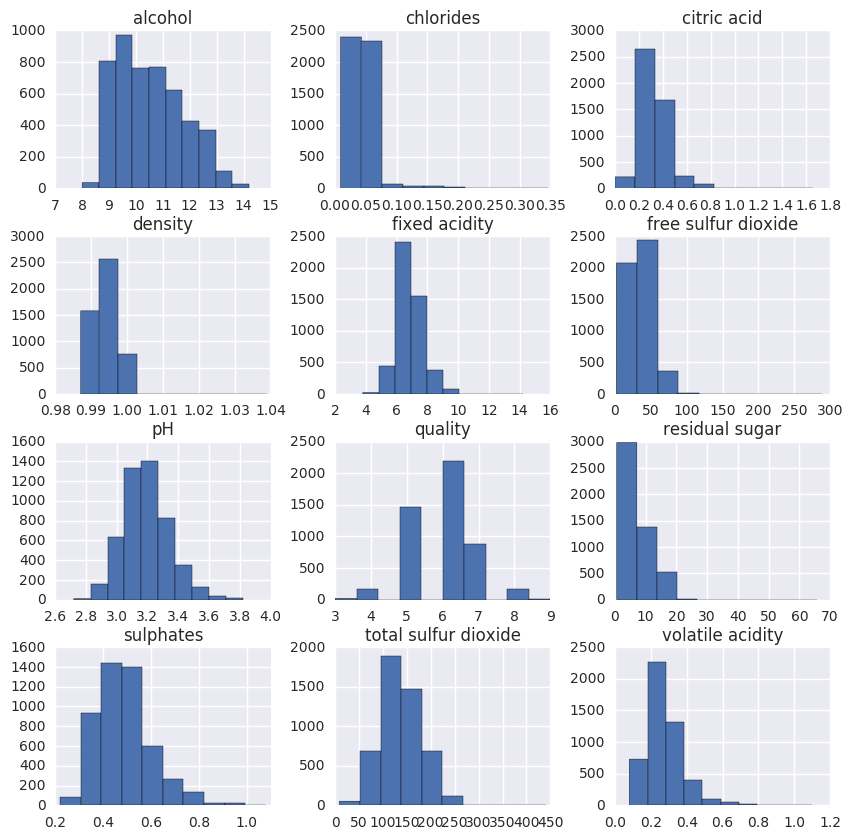

In [12]:
# The distribution of the data by visualizing with a bar plot
# white wine distribution
sns.set()
whitewine_df.hist(figsize=(10,10))
plt.show()

Very interesting to see how two colored wines differ in physicochemical properties. 
Just compare the red and white wine's 3rd whole column

We will just split the data into training and testing (0.2) and see how the regression predicts the testing data

This is without any preprocessing data. We just would like to see the how well it will perform by doing the least work. We will compare the results later

#### What we will use:
1. Linear
2. Ridge
3. Kernel
4. Source Vector
5. Lasso
6. Elastic Net

In [13]:
def score_linearRegression(X_train, X_test, y_train, y_test):
    linearRegression = linear_model.LinearRegression();
    linearRegression.fit(X_train, y_train)
    return linearRegression.score(X_test, y_test)

def score_ridgeRegression(X_train, X_test, y_train, y_test):
    ridgeRegression = linear_model.Ridge(alpha=1)
    ridgeRegression.fit(X_train, y_train)
    return ridgeRegression.score(X_test, y_test)

def score_kernelRegression(X_train, X_test, y_train, y_test):
    kernelRegression = kernel_ridge.KernelRidge(alpha=1)
    kernelRegression.fit(X_train, y_train)
    return kernelRegression.score(X_test, y_test)
    
def score_svRegression(X_train, X_test, y_train, y_test):
    svRegression = svm.SVR()
    svRegression.fit(X_train, y_train)
    return svRegression.score(X_test, y_test)
    
def score_lassoRegression(X_train, X_test, y_train, y_test):
    lassoRegression = linear_model.Lasso(alpha=1)
    lassoRegression.fit(X_train, y_train)
    return lassoRegression.score(X_test, y_test)

def score_elasticRegression(X_train, X_test, y_train, y_test):
    elasticRegression = linear_model.ElasticNet(alpha=1)
    elasticRegression.fit(X_train, y_train)
    return elasticRegression.score(X_test, y_test)

In [14]:
def score_allRegression(X_train, X_test, y_train, y_test):
    name = ["Linear Regression: ", "Ridge Regression: ", "Kernel Regression: ", "SV Regression: ", "Lasso Regression: ", "Elastic Regression: "]
    return [
        name[0] + str(score_linearRegression(X_train, X_test, y_train, y_test)),
        name[1] + str(score_ridgeRegression(X_train, X_test, y_train, y_test)),
        name[2] + str(score_kernelRegression(X_train, X_test, y_train, y_test)),
        name[3] + str(score_svRegression(X_train, X_test, y_train, y_test)),
        name[4] + str(score_lassoRegression(X_train, X_test, y_train, y_test)),
        name[5] + str(score_elasticRegression(X_train, X_test, y_train, y_test)) ]

In [15]:
def result_feature(X_train, X_test, y_train, y_test):
    return score_allRegression(X_train, X_test, y_train, y_test)

In [16]:
def barplot(score, title):
    global redwine_df
    columns = redwine_df[:-1]
    features_selection = score
    plt.figure(figsize=(10,5))
    plt.title(title)
    y_pos = np.arange(len(redwine_df.columns)-1)
    plt.bar(y_pos, features_selection, align='center')
    plt.xticks(y_pos, columns, rotation=90)
    plt.show()

In [17]:
# split the input and label
# red wine 
X_red = redwine_df.loc[:, redwine_df.columns != "quality"]
y_red = redwine_df["quality"]

# white wine
X_white = whitewine_df.loc[:, whitewine_df.columns != "quality"]
y_white = whitewine_df["quality"]

In [18]:
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2)

# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2)

In [19]:
print("red wine result: ")
result_feature(X_red_train, X_red_test, y_red_train, y_red_test)

red wine result: 


['Linear Regression: 0.347537173928',
 'Ridge Regression: 0.352097653638',
 'Kernel Regression: 0.343119850801',
 'SV Regression: 0.274955898203',
 'Lasso Regression: 0.0430025560415',
 'Elastic Regression: 0.0479970668672']

Poor score of red wine. Let's take a look at white wine now.

In [20]:
print("white wine result: ")
result_feature(X_white_train, X_white_test, y_white_train, y_white_test)

white wine result: 


['Linear Regression: 0.300022254637',
 'Ridge Regression: 0.28510880473',
 'Kernel Regression: 0.285243323991',
 'SV Regression: 0.296048596951',
 'Lasso Regression: 0.0164833097679',
 'Elastic Regression: 0.0306119655447']

Poor score of white wine as well. Looks like prediction on red wine was better but still weak.

Keep in mind that we are using all features of wine dataset.
Instead of using all of the dataset, can we select few features for regression (reduce features and dimensionality)?

We are going to explore four different methods of feature selection or extraction:
1. Pearson's Correlation
2. SelectKBest
3. Feature Importance

Let's explore Pearson's Correlation to see if "quality" feature has any positive or negative correlation with other features from this dataset

## Feature Selection using Pearson's Correlation

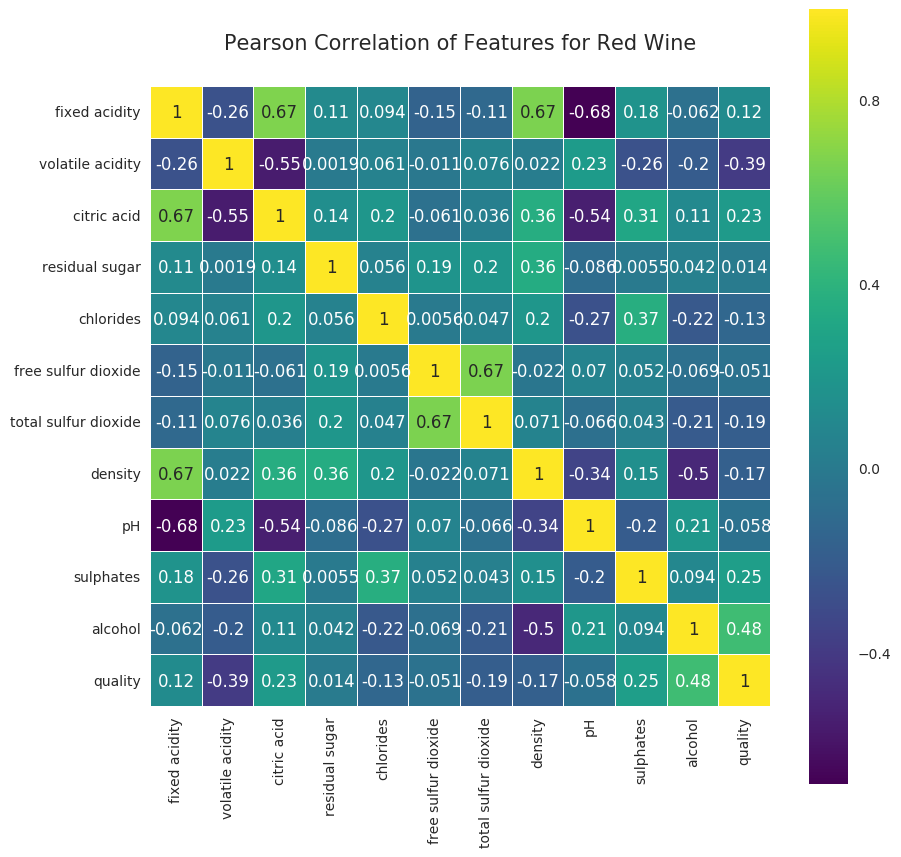

In [21]:
# Pearson's Correlation Matrix using colormap
# red wine 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features for Red Wine', y=1.05, size=15)
sns.heatmap(redwine_df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [22]:
# Feature selection using Pearson's Correlation

# red wine (alcohol, volatile acid, sulphate, citric acid)
X = redwine_df.filter(items=['alcohol', 'volatile acid' ,'sulphates', 'citric acid'])
Y = redwine_df['quality']
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]")
print("red wine result using Pearon's Correlation: ")
result_feature(X_red_train, X_red_test, y_red_train, y_red_test)

Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]
red wine result using Pearon's Correlation: 


['Linear Regression: 0.289819008134',
 'Ridge Regression: 0.290361418464',
 'Kernel Regression: 0.266146737735',
 'SV Regression: 0.303634889297',
 'Lasso Regression: -0.000272497346526',
 'Elastic Regression: -0.000272497346526']

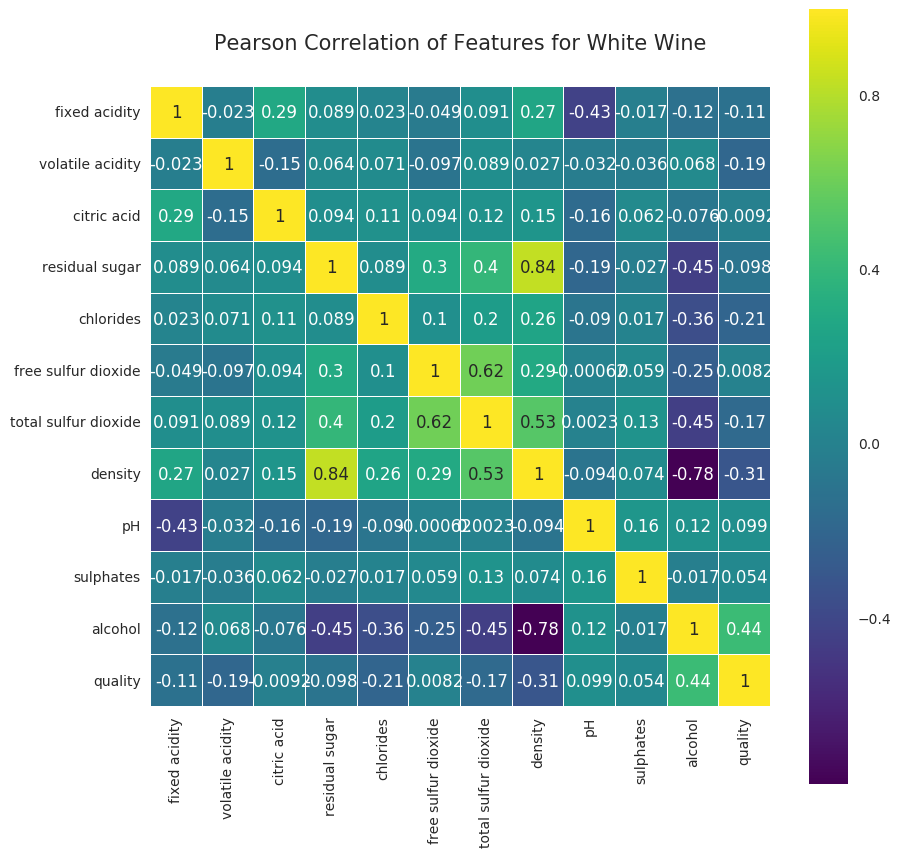

In [23]:
# Pearson's Correlation Matrix using colormap
# white wine 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features for White Wine', y=1.05, size=15)
sns.heatmap(whitewine_df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [24]:
# Feature selection using Pearson's Correlation

# white wine (alcohol, density, chlorides, volatile acid)
X = whitewine_df.filter(items=['alcohol', 'density', 'chlorides', 'volatile acid'])
Y = whitewine_df['quality']
# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Pearson's Correlation: [alcohol, density, chlorides, volatile acid]")
print("white wine result using Pearon's Correlation: ")
result_feature(X_white_train, X_white_test, y_white_train, y_white_test)

Features chosen for Pearson's Correlation: [alcohol, density, chlorides, volatile acid]
white wine result using Pearon's Correlation: 


['Linear Regression: 0.16648244637',
 'Ridge Regression: 0.165427169672',
 'Kernel Regression: 0.165288881914',
 'SV Regression: 0.142682367792',
 'Lasso Regression: -0.006397126102',
 'Elastic Regression: -0.006397126102']

#### Still very low result after even selection of features using Pearson's Correlation

#### Let's try some other feature selection technique. Let's try univariate selection. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

## Feature Selection using SelectKBest

In [25]:
# Feature selection using SelectKBest - Select features according to the k highest scores.

# red wine
array = redwine_df.values
X = array[:,0:11]
Y = array[:,11]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
# print( len(fit.scores_) )
# print( len(redwine_df.columns) ) 

print(fit.scores_)
print() 

for i in range(len(redwine_df.columns)-1):
    print(str(redwine_df.columns[i]) + ": "  + str(fit.scores_[i]))

[  1.126e+01   1.558e+01   1.303e+01   4.123e+00   7.524e-01   1.619e+02
   2.756e+03   2.304e-04   1.547e-01   4.558e+00   4.643e+01]

fixed acidity: 11.2606523696
volatile acidity: 15.5802890515
citric acid: 13.0256651036
residual sugar: 4.12329473592
chlorides: 0.75242557946
free sulfur dioxide: 161.936036048
total sulfur dioxide: 2755.55798423
density: 0.000230432045444
pH: 0.154654735634
sulphates: 4.5584877468
alcohol: 46.4298921505


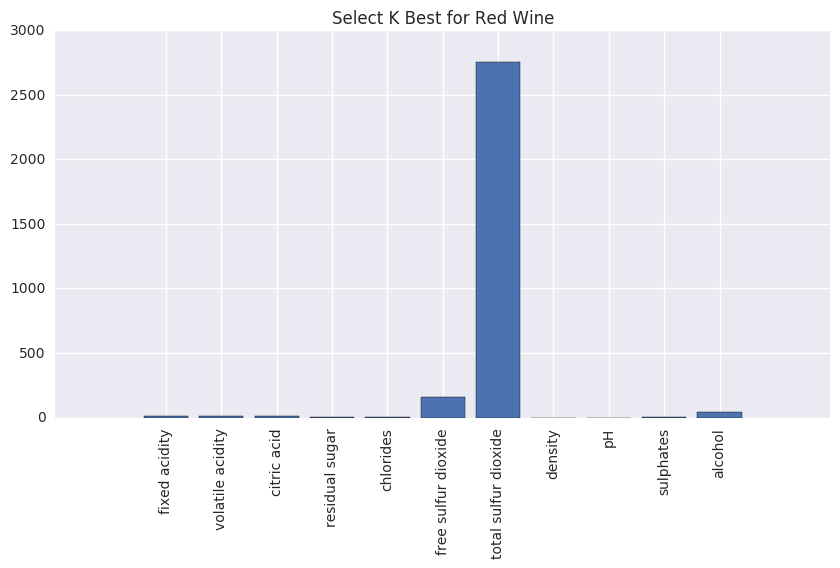

In [26]:
barplot(fit.scores_, "Select K Best for Red Wine")

In [27]:
# Feature selection using selectKBest

# red wine (total sulfur dioxide, free sulfur dioxide, alcohol)
X = redwine_df.filter(items=['total sulfur dioxide', 'free sulfur dioxide', 'alcohol'])
Y = redwine_df['quality']
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, Y, test_size=0.3)
print("Features chosen for selectKBest: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']")
print("red wine result using selectKBest: ")
result_feature(X_red_train, X_red_test, y_red_train, y_red_test)

Features chosen for selectKBest: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']
red wine result using selectKBest: 


['Linear Regression: 0.184059100854',
 'Ridge Regression: 0.184176958367',
 'Kernel Regression: 0.0730602311341',
 'SV Regression: 0.114083618436',
 'Lasso Regression: 0.0290656889563',
 'Elastic Regression: 0.0291400285839']

In [28]:
# Feature selection using SelectKBest - Select features according to the k highest scores.

# white wine
array = whitewine_df.values
X = array[:,0:11]
Y = array[:,11]

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X,Y)
# summarize scores
np.set_printoptions(precision=3)
# print( len(fit.scores_) )
# print( len(redwine_df.columns) ) 

print(fit.scores_)
print() 

for i in range(len(whitewine_df.columns)-1):
    print(str(whitewine_df.columns[i]) + ": "  + str(fit.scores_[i]))

[  7.922e+00   1.262e+01   8.511e-01   5.012e+02   2.529e+00   9.477e+02
   3.358e+03   5.065e-03   4.287e-01   5.792e-01   1.551e+02]

fixed acidity: 7.92204172601
volatile acidity: 12.6226360026
citric acid: 0.851118028185
residual sugar: 501.235223765
chlorides: 2.52900536413
free sulfur dioxide: 947.712845039
total sulfur dioxide: 3358.29843327
density: 0.00506505643732
pH: 0.428745484559
sulphates: 0.579205686338
alcohol: 155.078233879


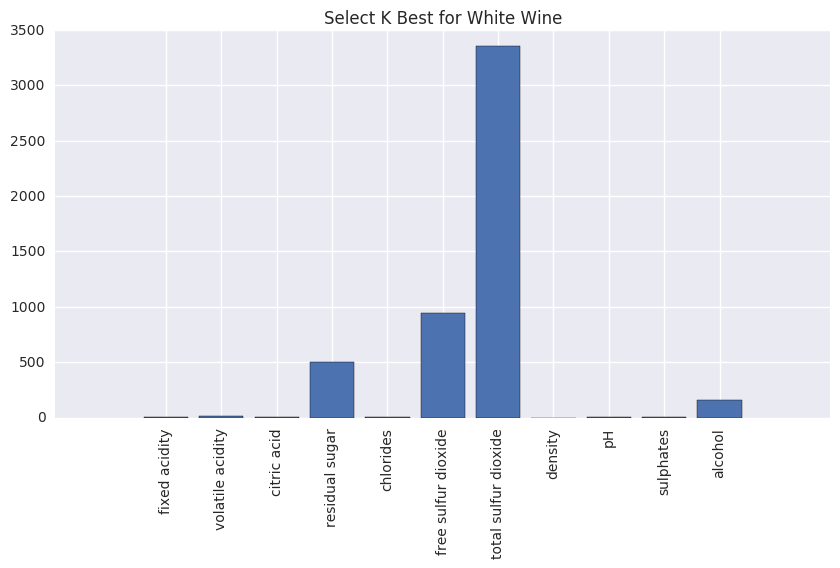

In [29]:
barplot(fit.scores_, "Select K Best for White Wine")

In [30]:
# white wine (total sulfur dioxide, free sulfur dioxide, alcohol)
X = whitewine_df.filter(items=['total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'alcohol'])
Y = whitewine_df['quality']
# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X, Y, test_size=0.3)
print("Features chosen for selectKBest: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']")
print("white wine result using selectKBest: ")
result_feature(X_white_train, X_white_test, y_white_train, y_white_test)

Features chosen for selectKBest: ['total sulfur dioxide', 'free sulfur dioxide', 'alcohol']
white wine result using selectKBest: 


['Linear Regression: 0.228882775663',
 'Ridge Regression: 0.22888212963',
 'Kernel Regression: 0.191557576883',
 'SV Regression: 0.298228392791',
 'Lasso Regression: 0.0429039653331',
 'Elastic Regression: 0.054776159313']

Still not convincing. Let's try a different method

## Feature Extraction using Feature Importance

In [31]:
# Feature Importance with Extra Trees Classifier

# red wine
array = redwine_df.values
X = array[:,0:11]
Y = array[:,11]

model = ExtraTreesClassifier()
model.fit(X,Y)
for i in range(len(redwine_df.columns)-1):
    print(str(redwine_df.columns[i]) + ": "  + str(model.feature_importances_[i]))

fixed acidity: 0.0768680931501
volatile acidity: 0.0941267414017
citric acid: 0.0850214852278
residual sugar: 0.0744984592871
chlorides: 0.079716029611
free sulfur dioxide: 0.07169827786
total sulfur dioxide: 0.107584216879
density: 0.0829128209943
pH: 0.0754737279274
sulphates: 0.10378911154
alcohol: 0.148311036121


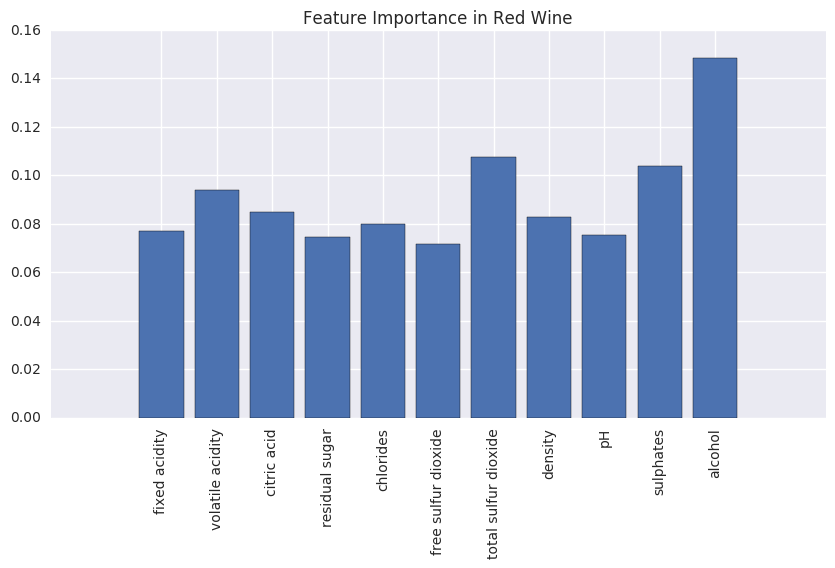

In [32]:
barplot(model.feature_importances_, "Feature Importance in Red Wine")

In [33]:
# Feature selection using Feature Importance

# red wine (alcohol, density, chlorides)
X = redwine_df.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
Y = redwine_df['quality']
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Feature Importance: ['alcohol', 'sulphates', 'total sulfur dioxide']")
print("red wine result using feature importance: ")
result_feature(X_red_train, X_red_test, y_red_train, y_red_test)

Features chosen for Feature Importance: ['alcohol', 'sulphates', 'total sulfur dioxide']
red wine result using feature importance: 


['Linear Regression: 0.323733897478',
 'Ridge Regression: 0.323250610633',
 'Kernel Regression: 0.313684099407',
 'SV Regression: 0.239047068268',
 'Lasso Regression: 0.0247271445563',
 'Elastic Regression: 0.0278033493934']

In [34]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# red wine
array = whitewine_df.values
X = array[:,0:11]
Y = array[:,11]

model = ExtraTreesClassifier()
model.fit(X,Y)
for i in range(len(redwine_df.columns)-1):
    print(str(redwine_df.columns[i]) + ": "  + str(model.feature_importances_[i]))

fixed acidity: 0.0786222737116
volatile acidity: 0.102833467637
citric acid: 0.0869270052173
residual sugar: 0.0826180014015
chlorides: 0.084808564591
free sulfur dioxide: 0.0910139226226
total sulfur dioxide: 0.0861476657106
density: 0.0885300261728
pH: 0.083816089486
sulphates: 0.0835590825672
alcohol: 0.131123900882


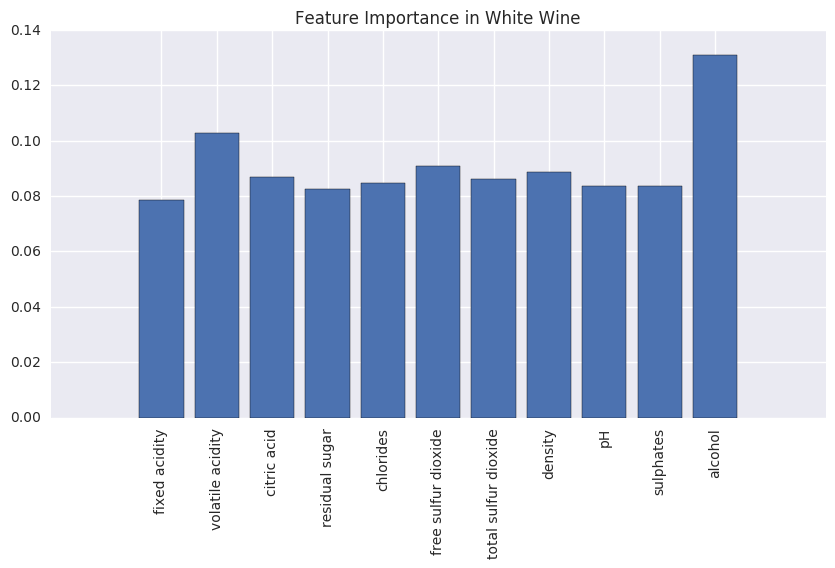

In [35]:
barplot(model.feature_importances_, "Feature Importance in White Wine")

In [36]:
# Feature selection using Feature Importance

# white wine
X = whitewine_df.filter(items=['alcohol', 'volatile acidity', 'free sulfur dioxide'])
Y = whitewine_df['quality']
# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Feature Importance: ['alcohol', 'volatile acidity', 'free sulfur dioxide']")
print("white wine result using feature importance: ")
result_feature(X_white_train, X_white_test, y_white_train, y_white_test)

Features chosen for Feature Importance: ['alcohol', 'volatile acidity', 'free sulfur dioxide']
white wine result using feature importance: 


['Linear Regression: 0.224103631685',
 'Ridge Regression: 0.223885404297',
 'Kernel Regression: 0.104787412875',
 'SV Regression: 0.194295454783',
 'Lasso Regression: -0.000223428513757',
 'Elastic Regression: -0.000223428513757']

Red Wine
--------
pearson's correlation:
	
	alcohol, volatile acid, sulphates

SelectKBEST: 

	total sulfur dioxide, free sulfur dioxide, alcohol

Feature Importance:

	alcohol, sulphates, total sulfur dioxide


Will Use:
1. alcohol : 3
2. sulphate : 2
3. total sulfur dioxide: 2


White Wine 
----------
pearson's correlation:
	
	alcohol, density, chlorides, volatile acid 

SelectKBEST: 

	total sulfur dioxide, free sulfur dioxide, residual sugar, alcohol

Feature Importance:
	
	alcohol, volatile acidity, free sulfur dioxide


Will Use:
1. alcohol : 3
2. volatile acidity : 2
3. free sulfur dioxide : 2

#### Introduction of Classification 

So far, we have explored the ways to select few features that would best be relevant to our training. Even after trying three different ways to select features, the accuracy scores returned from the regression models we are using produce poor results. I think it is because grade 5 and 6 dominates the distribution, and we do not have that many samples with grades lower than 5 or higher than 6. So I want to convert all the number scale grades to categorical variables (Low, Mid, High).

We are going to assign it this way:
1. 0-4 : Low Quality
2. 5-6 : Mid Quality
3. 7-10 : High Quality

Instead of regression, we are going to change this challenge into a classification task

1. SVM
2. Random Forest Classifier
3. Neural Network

In [37]:
# red wine replacement in quality
redwine_df.loc[redwine_df['quality'] < 5, 'quality'] = 1
redwine_df.loc[redwine_df['quality'] == 5, 'quality'] = 2
redwine_df.loc[redwine_df['quality'] == 6, 'quality'] = 2
redwine_df.loc[redwine_df['quality'] > 6, 'quality'] = 3

In [38]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [39]:
# white wine, replacement in quality
whitewine_df.loc[whitewine_df['quality'] < 5, 'quality'] = 1
whitewine_df.loc[whitewine_df['quality'] == 5, 'quality'] = 2
whitewine_df.loc[whitewine_df['quality'] == 6, 'quality'] = 2
whitewine_df.loc[whitewine_df['quality'] > 6, 'quality'] = 3

In [40]:
whitewine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


## Random Forest Classifier

##### RED Wine

In [41]:
from sklearn.ensemble import RandomForestClassifier

X_red = redwine_df.filter(items=['alcohol', 'sulphates', 'total sulfur dioxide'])
y_red = redwine_df['quality']

X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.3)
RF_clf = RandomForestClassifier()
RF_clf.fit(X_red_train, y_red_train)
print(RF_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [42]:
print('Training Accuracy of Random Forest: ', RF_clf.score(X_red_train, y_red_train))
print('Test Accuracy of Random Forest: ', RF_clf.score(X_red_test, y_red_test))

Training Accuracy of Random Forest:  0.984807864164
Test Accuracy of Random Forest:  0.854166666667


#### WHITE Wine

In [43]:
X_white = whitewine_df.filter(items=['alcohol', 'volatile acidity', 'free sulfur dioxide'])
y_white = whitewine_df['quality']

X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.3)
RF_clf = RandomForestClassifier()
RF_clf.fit(X_white_train, y_white_train)
print(RF_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [44]:
print('Training Accuracy of Random Forest: ', RF_clf.score(X_white_train, y_white_train))
print('Test Accuracy of Random Forest: ', RF_clf.score(X_white_test, y_white_test))

Training Accuracy of Random Forest:  0.978413068845
Test Accuracy of Random Forest:  0.791156462585


## SVM

In [45]:
titles = ('SVC with Linear Kernel', 
          'SVC with RBF Kernel',
          'SVC with Sigmoid Kernel',
          'LinearSVC (Linear kernel)'
#           'SVC with Poly Kernel degree = 3'
          )

In [46]:
def all_svm(iX, iY, jX, jY):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    models = [svm.SVC(kernel='linear', C=C),
              svm.SVC(kernel='rbf', gamma=0.7, C=C),
              svm.SVC(kernel='sigmoid', C=C),
              svm.LinearSVC(C=C),
#               svm.SVC(kernel='poly', degree=3, C=C)
             ]

    global titles
    
    for clf, title in zip(models, titles):
        clf.fit(iX, iY)
        print( title + " training score: " + str(clf.score(iX, iY)))
        print( title + " testing score: " + str(clf.score(jX, jY)))
        print()

### Red wine

In [64]:
all_svm(X_red_train, y_red_train, X_red_test, y_red_test)

SVC with Linear Kernel training score: 0.824843610366
SVC with Linear Kernel testing score: 0.825

SVC with RBF Kernel training score: 0.856121537087
SVC with RBF Kernel testing score: 0.84375

SVC with Sigmoid Kernel training score: 0.824843610366
SVC with Sigmoid Kernel testing score: 0.825

LinearSVC (Linear kernel) training score: 0.827524575514
LinearSVC (Linear kernel) testing score: 0.835416666667



### White wine

In [65]:
all_svm(X_white_train, y_white_train, X_white_test, y_white_test)

SVC with Linear Kernel training score: 0.746791131855
SVC with Linear Kernel testing score: 0.744897959184

SVC with RBF Kernel training score: 0.787339556593
SVC with RBF Kernel testing score: 0.759183673469

SVC with Sigmoid Kernel training score: 0.746791131855
SVC with Sigmoid Kernel testing score: 0.744897959184

LinearSVC (Linear kernel) training score: 0.747374562427
LinearSVC (Linear kernel) testing score: 0.744897959184



## Neural Network

In [59]:
class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron classifier.

    Parameters
    ------------
    n_output : int
      Number of output units, should be equal to the
      number of unique class labels.

    n_features : int
      Number of features (dimensions) in the target dataset.
      Should be equal to the number of columns in the X array.

    n_hidden : int (default: 30)
      Number of hidden units.

    l1 : float (default: 0.0)
      Lambda value for L1-regularization.
      No regularization if l1=0.0 (default)

    l2 : float (default: 0.0)
      Lambda value for L2-regularization.
      No regularization if l2=0.0 (default)

    epochs : int (default: 500)
      Number of passes over the training set.

    eta : float (default: 0.001)
      Learning rate.

    alpha : float (default: 0.0)
      Momentum constant. Factor multiplied with the
      gradient of the previous epoch t-1 to improve
      learning speed
      w(t) := w(t) - (grad(t) + alpha*grad(t-1))
    
    decrease_const : float (default: 0.0)
      Decrease constant. Shrinks the learning rate
      after each epoch via eta / (1 + epoch*decrease_const)

    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent circles.

    minibatches : int (default: 1)
      Divides training data into k minibatches for efficiency.
      Normal gradient descent learning if k=1 (default).

    random_state : int (default: None)
      Set random state for shuffling and initializing the weights.

    Attributes
    -----------
    cost_ : list
      Sum of squared errors after each epoch.

    """
    def __init__(self, n_output, n_features, n_hidden=30,
                 l1=0.0, l2=0.0, epochs=500, eta=0.001, 
                 alpha=0.0, decrease_const=0.0, shuffle=True, 
                 minibatches=1, random_state=None):

        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        """Encode labels into one-hot representation

        Parameters
        ------------
        y : array, shape = [n_samples]
            Target values.

        Returns
        -----------
        onehot : array, shape = (n_labels, n_samples)

        """
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)

        Uses scipy.special.expit to avoid overflow
        error for very small input values z.

        """
        # return 1.0 / (1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        """Compute gradient of the logistic function"""
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        """Add bias unit (column or row of 1s) to array at index 0"""
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        """Compute feedforward step

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ----------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        z3 : array, shape = [n_output_units, n_samples]
          Net input of output layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        """
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        """Compute L2-regularization cost"""
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2) + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        """Compute L1-regularization cost"""
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum() + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        """Compute cost function.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        output : array, shape = [n_output_units, n_samples]
          Activation of the output layer (feedforward)

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------
        cost : float
          Regularized cost.

        """
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        """ Compute gradient step using backpropagation.

        Parameters
        ------------
        a1 : array, shape = [n_samples, n_features+1]
          Input values with bias unit.

        a2 : array, shape = [n_hidden+1, n_samples]
          Activation of hidden layer.

        a3 : array, shape = [n_output_units, n_samples]
          Activation of output layer.

        z2 : array, shape = [n_hidden, n_samples]
          Net input of hidden layer.

        y_enc : array, shape = (n_labels, n_samples)
          one-hot encoded class labels.

        w1 : array, shape = [n_hidden_units, n_features]
          Weight matrix for input layer -> hidden layer.

        w2 : array, shape = [n_output_units, n_hidden_units]
          Weight matrix for hidden layer -> output layer.

        Returns
        ---------

        grad1 : array, shape = [n_hidden_units, n_features]
          Gradient of the weight matrix w1.

        grad2 : array, shape = [n_output_units, n_hidden_units]
            Gradient of the weight matrix w2.

        """
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))

        return grad1, grad2

    def predict(self, X):
        """Predict class labels

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        Returns:
        ----------
        y_pred : array, shape = [n_samples]
          Predicted class labels.

        """
        if len(X.shape) != 2:
            raise AttributeError('X must be a [n_samples, n_features] array.\n'
                                 'Use X[:,None] for 1-feature classification,'
                                 '\nor X[[i]] for 1-sample classification')

        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        """ Learn weights from training data.

        Parameters
        -----------
        X : array, shape = [n_samples, n_features]
          Input layer with original features.

        y : array, shape = [n_samples]
          Target class labels.

        print_progress : bool (default: False)
          Prints progress as the number of epochs
          to stderr.

        Returns:
        ----------
        self

        """
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):
            
            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_enc = X_data[idx], y_enc[:, idx]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            for idx in mini:

                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X_data[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                      output=a3,
                                      w1=self.w1,
                                      w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                  a3=a3, z2=z2,
                                                  y_enc=y_enc[:, idx],
                                                  w1=self.w1,
                                                  w2=self.w2)

                delta_w1, delta_w2 = self.eta * grad1, self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

### Red Wine 

In [63]:
vX_red_train = X_red_train.values
vy_red_train = y_red_train.values
vX_red_test = X_red_test.values
vy_red_test = y_red_test.values


nn = NeuralNetMLP(n_output=10, 
                  n_features=X_red_train.shape[1], 
                  n_hidden=45, 
                  l2=0.1, 
                  l1=0.001, 
                  epochs=150, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)
start_time = time.time()
nn.fit(vX_red_train, vy_red_train, print_progress=True)
end_time = time.time()
elapsed_time = end_time-start_time
rate = elapsed_time/nn.epochs

y_train_pred = nn.predict(vX_red_train)

if sys.version_info < (3, 0):
    acc_train = (np.sum(vy_red_train == y_train_pred, axis=0)).astype('float') / vX_red_train.shape[0]
else:
    acc_train = np.sum(vy_red_train == y_train_pred, axis=0) / vX_red_train.shape[0]


y_test_pred = nn.predict(vX_red_test)

if sys.version_info < (3, 0):
    acc_test = (np.sum(vy_red_test == y_test_pred, axis=0)).astype('float') / vX_red_test.shape[0]
else:
    acc_test = np.sum(vy_red_test == y_test_pred, axis=0) / vX_red_test.shape[0]

print( "{:,.2f}".format(elapsed_time))
print( "{:,.2f}".format(rate))
print()
print("Neural Network Accuracy Training Score: " + str(acc_train * 100))
print("Neural Network Accuracy Testing Score: " + str(acc_test * 100))

Epoch: 150/150

2.67
0.02

Neural Network Accuracy Training Score: 82.4843610366
Neural Network Accuracy Testing Score: 82.5


### White Wine

In [67]:
vX_white_train = X_white_train.values
vy_white_train = y_white_train.values
vX_white_test = X_white_test.values
vy_white_test = y_white_test.values


nn = NeuralNetMLP(n_output=10, 
                  n_features=X_white_train.shape[1], 
                  n_hidden=45, 
                  l2=0.1, 
                  l1=0.001, 
                  epochs=150, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)
start_time = time.time()
nn.fit(vX_white_train, vy_white_train, print_progress=True)
end_time = time.time()
elapsed_time = end_time-start_time
rate = elapsed_time/nn.epochs

y_train_pred = nn.predict(vX_white_train)

if sys.version_info < (3, 0):
    acc_train = (np.sum(vy_white_train == y_train_pred, axis=0)).astype('float') / vX_white_train.shape[0]
else:
    acc_train = np.sum(vy_white_train == y_train_pred, axis=0) / vX_white_train.shape[0]

y_test_pred = nn.predict(vX_white_test)

if sys.version_info < (3, 0):
    acc_test = (np.sum(vy_white_test == y_test_pred, axis=0)).astype('float') / vX_white_test.shape[0]
else:
    acc_test = np.sum(vy_white_test == y_test_pred, axis=0) / vX_white_test.shape[0]

print( "{:,.2f}".format(elapsed_time))
print( "{:,.2f}".format(rate))
print()
print("Neural Network Accuracy Training Score: " + str(acc_train * 100))
print("Neural Network Accuracy Testing Score: " + str(acc_test * 100))

Epoch: 150/150

3.86
0.03

Neural Network Accuracy Training Score: 74.6791131855
Neural Network Accuracy Testing Score: 74.4897959184
